# ESP32 Client Test

In [52]:
!pip install git+https://gitlab.com/bionanoimaging/nanoimagingpack
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import requests
import json
import time
import io
#import PIL.Image
import numpy as np
import functools
import matplotlib.pyplot as plt
import ESP32_restapi_client as espc



  Cloning https://gitlab.com/bionanoimaging/nanoimagingpack to /private/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/pip-req-build-tigeme1w
  Running command git clone -q https://gitlab.com/bionanoimaging/nanoimagingpack /private/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/pip-req-build-tigeme1w
  Resolved https://gitlab.com/bionanoimaging/nanoimagingpack to commit 9d751755ba25765a7a96787a8b24dea0720b504c
  Using cached scikit_tensor_py3-0.4.1-py3-none-any.whl (48 kB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Using cached scipy-1.3.3-cp38-cp38-macosx_10_9_x86_64.whl (28.1 MB)
  Using cached dask-2021.10.0-py3-none-any.whl (1.0 MB)
  Using cached dask-2021.9.0-py3-none-any.whl (1.0 MB)
  Using cached dask-2021.8.1-py3-none-any.whl (1.0 MB)
  Using cached dask-2021.8.0-py3-none-any.whl (995 kB)
  Using cached dask-2021.7.2-py3-none-any.whl (987 kB)
  Created wheel for NanoImagingPack: filename=NanoImagingPack-2.1.3.dev1-py3-none-any.whl size=5096842 sha256=677975cc5fe1556d6e19512

In [7]:
host = '192.168.43.66'
esp32 = espc.ESP32Client(host, port=80)

In [55]:
#%%
mask = np.random.randn(320,240)
image = np.zeros((320,240))
image[mask >.2]=255
#image = np.ones((320,240))*255
#image = np.ones((320,240))*255
#image[100:110,:]=0

esp32.send_jpeg(image)


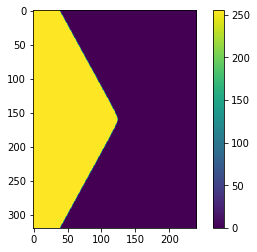

In [86]:
#%%
Nx = 320
Ny = 240
decenter_x = 0
mask = np.random.randn(Nx,Ny)
image = np.zeros((320,240))
image[mask >.2]=1

cx = 500
cy = 0

mask=nip.rr((Nx,Ny))+cx*nip.xx((Nx, Ny), freq='ftfreq')
mask = mask <10 

if(1):
    image = np.ones((Nx,Ny))*255
    dblock = 5
    image[85:95,65:70] = 0
    image = np.uint8(mask*255)
    #esp32.send_jpeg(image)

plt.imshow(image), plt.colorbar()
plt.show()

In [46]:
I_max = 255
N_leds = 4
led_pattern = np.array((np.reshape(np.random.randint(0,I_max ,N_leds**2),(N_leds,N_leds)),
               np.reshape(np.random.randint(0,I_max ,N_leds**2),(N_leds,N_leds)),
               np.reshape(np.random.randint(0,I_max ,N_leds**2),(N_leds,N_leds))))

led_pattern = np.ones((3,N_leds,N_leds))*0
led_pattern[:,1:3,1:3]=255
led_pattern[:,2,2]=255

#led_pattern[8,:,:]#= (255,255,255)
esp32.send_ledmatrix(led_pattern)



http://192.168.43.66:80/matrix
{'red': [0.0, 0.0, 0.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'green': [0.0, 0.0, 0.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'blue': [0.0, 0.0, 0.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 255.0, 255.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [37]:
image

array([[  0.,   0.,   0., ...,   0., 255., 255.],
       [255.,   0.,   0., ..., 255.,   0.,   0.],
       [  0., 255., 255., ...,   0.,   0., 255.],
       ...,
       [  0.,   0., 255., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.]])

In [212]:
esp32.move_z(steps=-10,  speed=700)

{}

In [ ]:
esp32.set_led(colour=(255,0,0))